In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load Data from Excel
YEN= pd.read_excel('CORRELATION DATA.xlsx', sheet_name ='YEN', index_col='YEAR') #Yenagoa
IK= pd.read_excel('CORRELATION DATA.xlsx', sheet_name ='IK', index_col='YEAR') #Ikot Akpaden
IBN= pd.read_excel('CORRELATION DATA.xlsx', sheet_name ='IBN', index_col='YEAR') #Ibadan
ABJ= pd.read_excel('CORRELATION DATA.xlsx', sheet_name ='ABJ', index_col='YEAR') #Abuja
JAL= pd.read_excel('CORRELATION DATA.xlsx', sheet_name ='JAL', index_col='YEAR') #Jalingo
SOK= pd.read_excel('CORRELATION DATA.xlsx', sheet_name ='SOK', index_col='YEAR') #Sokoto
GOM= pd.read_excel('CORRELATION DATA.xlsx', sheet_name ='GOM', index_col='YEAR') #Gombe
KUK= pd.read_excel('CORRELATION DATA.xlsx', sheet_name ='KUK', index_col='YEAR') #Kukawa

# 2. Preview the data
print(YEN.head())

            Ref.  Temp.   Pres.    RH.  Precip.
YEAR                                           
1981  380.695045  25.62  1009.3  86.42  3059.43
1982  380.214712  25.22  1009.3  87.64  5604.64
1983  378.615264  25.29  1009.8  86.08  4942.96
1984  379.021151  25.26  1008.6  86.73  2551.80
1985  379.663012  25.40  1009.0  86.58  2105.43


In [37]:
# 3. Define Features (X) and Target (y)
X = IK[['Temp.', 'Pres.', 'RH.', 'Precip.']]  # Features ('Temperature', 'Pressure', 'Humidity', 'Precipitation')
y = IK['Ref.']  # Target ('REfractivity)

In [38]:
# 4. Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predict on Test Set
y_pred = model.predict(X_test)

# 7. Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Model Evaluation:
Mean Squared Error (MSE): 0.0005
Root Mean Squared Error (RMSE): 0.0227
R-squared (R²): 0.9999


In [39]:
# 8. Display Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nRegression Coefficients:")
print(coefficients)


Regression Coefficients:
         Coefficient
Temp.       5.690021
Pres.       0.266524
RH.         1.488397
Precip.     0.000009


In [40]:
import statsmodels.api as sm

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X).fit()

# Print the summary, including coefficients, p-values, R², etc.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ref.   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.282e+05
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           4.64e-76
Time:                        10:44:54   Log-Likelihood:                 103.79
No. Observations:                  42   AIC:                            -197.6
Df Residuals:                      37   BIC:                            -188.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -162.2554     11.746    -13.814      0.000    -186.055    -138.456
Temp.          5.6923      0.014    410.310      0.000       5.664       5.720
Pres.          0.2660      0.012     23.041      0.000       0.243       0.289
RH.            1.4861      0.003    478.119      0.000       1.480       1.492
Precip.     8.042e-06   4.83e-06      1.665      0.104   -1.74e-06    1.78e-05
==============================================================================
Omnibus:                        6.761   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                5.530
Skew:                           0.828   Prob(JB):                       0.0630
Kurtosis:                       3.646   Cond. No.                     9.96e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

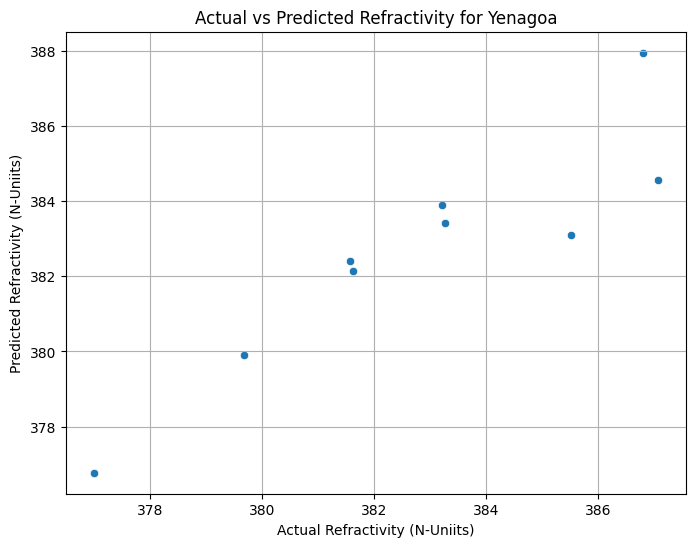

In [23]:
# 9. Optional: Plot Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Refractivity (N-Uniits)")
plt.ylabel("Predicted Refractivity (N-Uniits)")
plt.title("Actual vs Predicted Refractivity for Yenagoa")
plt.grid(True)
plt.show()

In [32]:
#OLS for all locations at a go

import pandas as pd
import statsmodels.api as sm

# List of sheet names for the 8 locations
locations = ['YEN', 'IK', 'IBN', 'ABJ', 'JAL', 'SOK', 'GOM', 'KUK']

# Load the Excel file once
excel_file = pd.ExcelFile("CORRELATION DATA.xlsx")  

# Loop through each location sheet and analyze
for loc in locations:
    print(f"\n--- Regression Analysis for {loc} ---")
    
    # Read the specific sheet for this location
    df = excel_file.parse(sheet_name=loc)
    
    # Define predictors and target (update column names to match your file)
    X = df[['Temp.', 'Pres.', 'RH.', 'Precip.']]
    y = df['Ref.']
    
    # Add constant (intercept)
    X = sm.add_constant(X)
    
    # Fit regression model
    model = sm.OLS(y, X).fit()
    
    # Print model summary for p-values and coefficients
    print(model.summary())


--- Regression Analysis for YEN ---
                            OLS Regression Results                            
Dep. Variable:                   Ref.   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     42.60
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           2.30e-13
Time:                        10:31:21   Log-Likelihood:                -64.402
No. Observations:                  42   AIC:                             138.8
Df Residuals:                      37   BIC:                             147.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -80

In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# List of sheet names (adjust to match your Excel file)
locations = ['YEN', 'IK', 'IBN', 'ABJ', 'JAL', 'SOK', 'GOM', 'KUK']

# Load Excel file with your data
excel_file = pd.ExcelFile("CORRELATION DATA.xlsx")  # Replace with your actual Excel file

# Create Excel writer
with pd.ExcelWriter("Regression_Results_All_Locations.xlsx", engine='xlsxwriter') as writer:
    for loc in locations:
        # Read each location's data
        df = excel_file.parse(sheet_name=loc)

        # Define predictors (independent variables) and target (dependent variable)
        X = df[['Temp.', 'Pres.', 'RH.', 'Precip.']]
        y = df['Ref.']

        # Add constant term for intercept
        X = sm.add_constant(X)

        # Fit the multiple regression model
        model = sm.OLS(y, X).fit()

        # Extract coefficients, p-values, and standard errors
        results_df = pd.DataFrame({
            'Coefficient': model.params,
            'p-value': model.pvalues,
            'Std. Error': model.bse
        })

        # Calculate evaluation metrics
        r_squared = model.rsquared
        mse = model.mse_resid
        rmse = np.sqrt(mse)
        f_stat = model.fvalue

        # Create DataFrame for model evaluation metrics
        metrics_df = pd.DataFrame({
            'Coefficient': [r_squared, mse, rmse, f_stat],
            'p-value': [None, None, None, None],
            'Std. Error': [None, None, None, None]
        }, index=['R-squared', 'MSE', 'RMSE', 'F-statistic'])

        # Combine coefficients and evaluation metrics
        full_results = pd.concat([results_df, metrics_df])

        # Save to Excel sheet named after the location
        full_results.to_excel(writer, sheet_name=loc)

print("✅ Regression results saved to 'Regression_Results_All_Locations.xlsx'.")

C:\Users\HP 1040\AppData\Local\Temp\ipykernel_13632\1679906077.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_results = pd.concat([results_df, metrics_df])
C:\Users\HP 1040\AppData\Local\Temp\ipykernel_13632\1679906077.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_results = pd.concat([results_df, metrics_df])
C:\Users\HP 1040\AppData\Local\Temp\ipykernel_13632\1679906077.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecate

✅ Regression results saved to 'Regression_Results_All_Locations.xlsx'.


C:\Users\HP 1040\AppData\Local\Temp\ipykernel_13632\1679906077.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_results = pd.concat([results_df, metrics_df])
C:\Users\HP 1040\AppData\Local\Temp\ipykernel_13632\1679906077.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_results = pd.concat([results_df, metrics_df])
C:\Users\HP 1040\AppData\Local\Temp\ipykernel_13632\1679906077.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecate

In [34]:
!pip install XlsxWriter